# NLTK 자연어 처리 패키지
NLTK(Natural Language Toolkit) 패키지는 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지다. 다양한 기능 및 예제를 가지고 있으며 실무 및 연구에서도 많이 사용된다.
<br>
<br>
NLTK 패키지가 제공하는 주요 기능은 다음과 같다.
- 말뭉치
- 토큰 생성
- 형태소 분석
- 품사 태깅


## 목차
- 말뭉치
- 토큰화
- 정규화
- 빈도 분석
- 워드 클라우드
- 한글 형태소 분석
- 확률론적 언어 모형
- Bag of Words
- TF-IDF


## 필요지식
- 확률론 기초
    - 조건부 확률
- 파이썬 기초

## 필요 패키지
- NLTK
- KoNLPy
- Gensim
- Scikit-Learn

## 말뭉치
- 말뭉치(Corpus)
    - 텍스트 분석에 필요한 텍스트 데이터


- 웹 크롤링(web scrawling)등으로 수집
- 텍스트 처리 패키지에서 제공하는 샘플 말뭉치 사용

단순히 소설, 신문 등의 문서를 모아놓은 것도 있지만 품사, 형태소, 등의 보조적 의미를 추가하고 쉬운 분석을 위해 구조적인 형태로 정리해 놓은 것을 포함한다.\
Corpus가 없으면 자연어 연구 자체를 하기 어렵다. 한글 corpus는 적은게 현실... 또한 저작권 문제로 인해 사용이 어렵다.

### [실습]

### step 1 : 샘플 말뭉치 다운로드

In [1]:
%%time
import nltk
nltk.download('book')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

### step 2 : 구텐베르그 말뭉치 목록

In [2]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

### step 3 : "제인 오스틴"의 "엠마" 말뭉치

In [3]:
emma_raw = nltk.corpus.gutenberg.raw('austen-emma.txt')
print(emma_raw[:702])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.


## 토큰화
- 토큰화(Tekenizing)
    - 말뭉치(텍스트 데이터)를 "토큰"이라고 불리는 작은 단위로 나누는 행위
- 토큰(Token)
    - 문장, 단어, 형태소 등 분석에 있어서 의미를 가지는 단위
    - 자신이 원하는 것을 토큰으로 정의(문장이면 문장이 토큰, 단어면 단어가 토큰...)
- 토큰의 명칭
    - 토큰의 이름은 실제 토큰의 활용과 관계가 없다.
    - 숫자 혹은 기호로 나타내거나
    - 품사 등을 덧붙여서 쓰는 경우도 있음

> 형태소
1. 의미를 가지는 요소로서는 더 이상 분석할 수 없는 가장 작은 말의 단위
2. 문법적$\cdot$관계적인 뜻만을 나타내는 단어 또는 단어의 부분

### 토큰의 종류
- 영어 : 의미가 같은 정규화된 단어
    - I am a boy. -> I + an + a + boy + .
- 한국어 : 의미가 같은 정규화된 형태소
    - 나는 소년이다. -> 나 + 는 + 소년 + 이 + 다 + .

### 형태소
- 형태소(morpheme)
    - 의미를 가진 가장 작은 말의 단위
- 한국어 형태소
    - 자립 형태소 : 체언(명사, 대명사, 수사), 수식언(관형사, 부사), 감탄사 등
    - 의존 형태소 : 접사, 어미, 조사, 어간 등

### 정규화
- 정규화(Normalization)
    - 의미나 쓰임이 같은 단어를 같은 토큰으로 표시
- 대소문자 통합(case removal)
    - Am I a boy?
    - I am a boy? 
        - Am, am은 동일한 토큰이다. 
- 어간 추출(stemming)
- 표제어 추출(lemmaization)
- 품사 부착(Part-Of-Speech tagging)
    - fly/v (날다)
    - fly/n (파리)
- 불용어(stopwords)

### 어간 추출
- 어간 추출(stemming)
    - 단어를 어간과 접사로 분리하여 단순히 접사를 삭제하거나 교체
        - 어간(stem) : 단어의 의미를 담고 있는 핵심 부분
        - 접사(affix) : 단어에 부가적인 의미를 주는 부분
- 단순 알고리즘 사용
    - 포터(Porter) 알고리즘
    - 랭케스터(Lancaster) 알고리즘


### 표제어 추출
- 표제어 추출(Lemmatization)
    - 기본 사전형 단어로 변형
    - am, is, are, was, were, been => be
    - has, had => have
    - 사전 정보(WordNet) 사용

### 품사 부착
- 품사 (POS : Part-Of-Speech)
    - 단어의 쓰임에 따른 구분
- 동일한 철자의 단어가 다른 의미나 다른 품사로 쓰이는 경우
    - 다른 토큰으로 토큰화 해야 한다.
- 예:
    - Permit : 허락하다(동사), 허가증(명사)
    - Refuse : 거부하다(동사), 쓰레기/배출(명사)

### 불용어
- 불용어(Stop-Words)
    - 분선의 필요성이 없는 단어
    - 모든 문서에서 너무 자주 쓰이는 단어
    - 너무 드물게 나타나는 단어

#### [실습]

#### step 1 : 토큰화
- NLTK의 word_tokenize 함수 사용

In [4]:
sent = emma_raw[50:196]
print(sent)

Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence


In [5]:
from nltk.tokenize import word_tokenize
word_tokenize(sent)

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence']

#### step 2 : 어간 추출
- NLTK의 porterStemmer, LancasterStemmer 사용

In [6]:
from nltk.stem import PorterStemmer, LancasterStemmer

In [9]:
st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ['fly', 'flies', 'flying', 'flew', 'flown']

# 단순한 알고리즘이라 정확하지가 않다.
print('Porter Stemmer : ', [st1.stem(w) for w in words])
print('Lancaster Stemmer : ', [st2.stem(w) for w in words])

Porter Stemmer :  ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer :  ['fly', 'fli', 'fly', 'flew', 'flown']


#### step 3 : 표제어 추출
- NLTK의 WordNetLemmatizer 사용

In [15]:
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

[lm.lemmatize(w, pos='v') for w in words] # pos : optional argument / v : verb

['fly', 'fly', 'fly', 'fly', 'fly']

#### step 4 : 품사 부착
- NLTK의 pos_tag 사용

In [16]:
from nltk.tag import pos_tag

sentence = 'Emma refused to permit us to obtain the refuse permit'
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

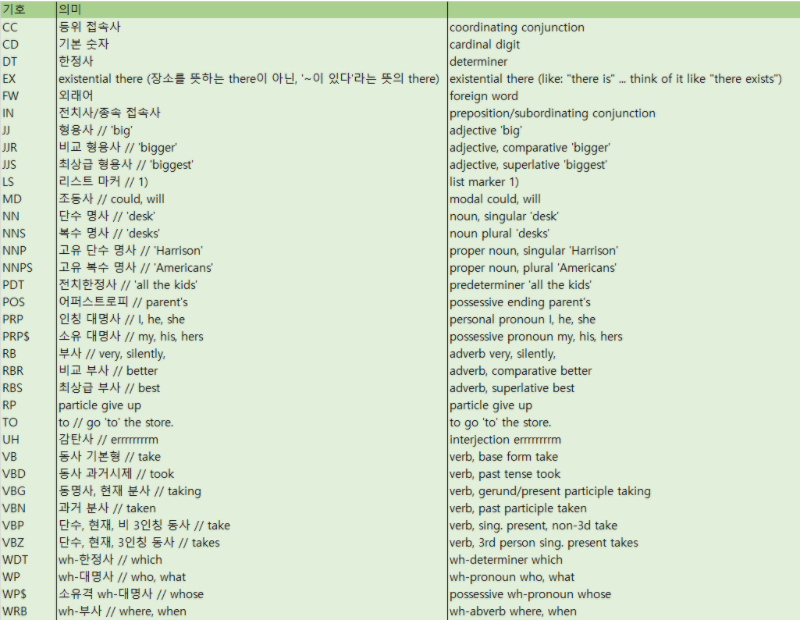

In [17]:
def tokenizer(doc):
    return ['/'.join(p) for p in tagged_list]

tokenizer(sentence)

['Emma/NNP',
 'refused/VBD',
 'to/TO',
 'permit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

#### step 5 : 불용어 처리
- NLTK의 stopwords 사용

In [18]:
from nltk.corpus import stopwords

In [19]:
stopwords.words('english')[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

## NLTK의 빈도 분석
- 두 가지 클래스 사용
    - Text 클래스
    - FreqDist 클래스

### Text 클래스
NLTK의 Text 클래스는 문서 분석에 유용한 여러가지 메소드를 제공한다.
- plot : 단어 빈도 그래프
- dispersion_plot : 단어 위치 그래프
- concordance : 단어 문맥 인쇄
- similar : 유사 단어 검색
- plot : 빈도 그래프

#### [실습]

#### step 1 : 클래스 객체 생성

In [20]:
from nltk import Text

# 원문을 토큰화 해서 집어 넣어야 한다
text = Text(word_tokenize(emma_raw))

#### step 2 : 단어 빈도 그래프
plot 메소드를 사용하면 각 단어(토큰)의 사용 빈도를 그래프로 그려준다.

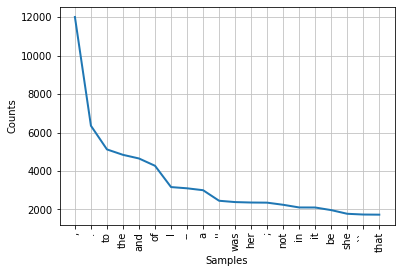

In [22]:
import matplotlib.pyplot as plt

text.plot(20) # 여기서 20은 빈도수 top-20임
plt.show()

#### step 3 : 단어 위치 그래프
dispersion_plot 메소드는 단어가 사용된 위치를 시각화한다.\
소설 엠마의 각 등장인물에 대해 적용하면 다음과 같은 결과를 얻는다.

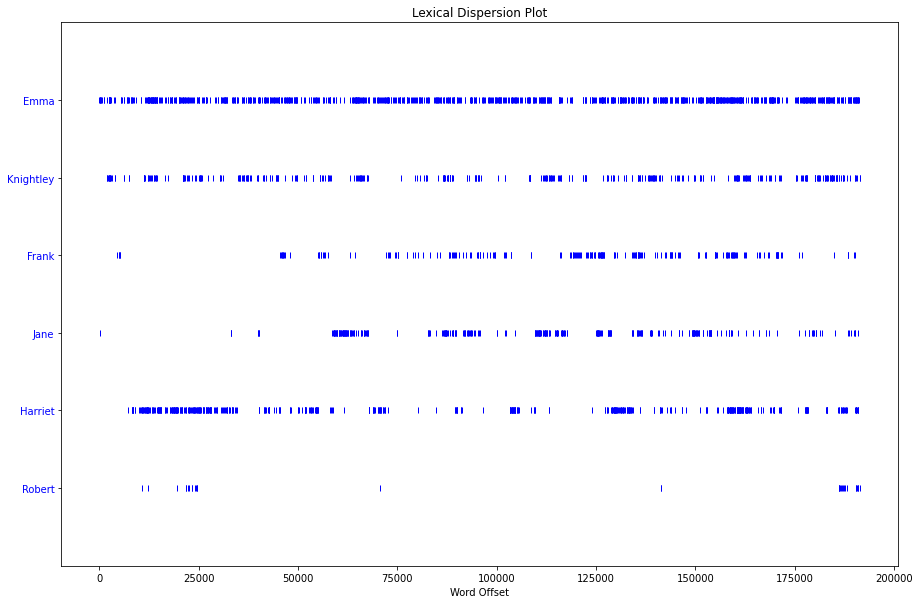

In [27]:
plt.figure(figsize=(15,10))
text.dispersion_plot(['Emma', 'Knightley', 'Frank', 'Jane', 'Harriet', 'Robert'])
# plt.show()

#### step 4 : 단어 문맥 인쇄
concordance 메소드로 단어가 사용된 위치를 직접 표시하면 문맥(context)이 어떤지 볼 수 있다.\
여기에서 문맥은 해당 단어의 앞과 뒤에 사용된 단어를 뜻한다.
```python
Text.concordance(word, width=79, lines=25)
```

In [41]:
print(text.concordance('Emma')) # Emma가 쓰인 앞 뒤 단어(문장)을 보여준다.
# 또한 윈도우라는 말도 쓴다
# 윈도우가 1이다 하면 Emma 앞뒤에 한 단어
# 윈도우가 2이다 하면 Emma 앞뒤에 두 단어 이런 식으로 쓰인다.

Displaying 25 of 855 matches:
                                     Emma by Jane Austen 1816 ] VOLUME I CHAPT
                                     Emma Woodhouse , handsome , clever , and 
both daughters , but particularly of Emma . Between _them_ it was more the int
 friend very mutually attached , and Emma doing just what she liked ; highly e
r own . The real evils , indeed , of Emma 's situation were the power of havin
ding-day of this beloved friend that Emma first sat in mournful thought of any
ing only half a mile from them ; but Emma was aware that great must be the dif
y . It was a melancholy change ; and Emma could not but sigh over it , and wis
 the rest of her life at Hartfield . Emma smiled and chatted as cheerfully as 
able to tell her how we all are . '' Emma spared no exertions to maintain this
 ' I have a great regard for you and Emma ; but when it comes to the question 
ful , troublesome creature ! '' said Emma playfully . `` That is what you have
e few people who could

#### step 5 : 유사 단어 검색
similar 메소드는 같은 문맥에서 주어진 단어 대신 사용된 횟수가 높은 단어들을 찾는다.

In [44]:
text.similar('Emma', 1)
# nltk에서는 보통 윈도우1을 사용한다.
# ## Emma ## 과 ## she ## 로 쓰일때  ##_##일때 Emma와 she가 제일 많이 매칭된다는 의미인가?

she


#### step 6 : 공통 문맥 인쇄
두 단어의 공통 문맥을 보려면 common_contexts 메소드를 사용한다.

In [46]:
text.common_contexts(['Emma', 'she'], 1)
# but Emma was / but she was 가 제일 많이 쓰인것

but_was


### FreqDist 클래스
- FreqDist 클래스는 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스이다.
- Text 클래스의 vocab 메소드로 추출할 수 있다.
- 토큰 리스트를 넣어서 직접 만들 수도 있다.



- 빈도 분석에 유용한 여러가지 메소드를 제공한다.
    - N : 빈도(횟수)
    - freq : 빈도(퍼센트)
    - most_common : 가장 많이 나오는 단어
    - plot : 가장 많이 나오는 단어 플롯

#### [실습]

#### step 1 : Text 클래스에서 생성

In [47]:
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

#### step 2 : 토큰 리스트에서 생성
- 다음 코드에서는 Emma 말뭉치에서 사람의 이름(NNP)만 모아서 FreqDist 클래스 객체를 만들었다.
- 품사 태그에서 NNP (고유대명사)이면서 필요없는 단어(stopwords)는 제거하였다.

In [50]:
from nltk import FreqDist

stopwords = ['Mr.', 'Mrs.', 'Miss', 'Mr', 'Mrs', 'Dear'] # 얘네도 NNP로 잡힘
emma_tokens = pos_tag(word_tokenize(emma_raw))
names_list = [t[0] for t in emma_tokens if (t[1] =='NNP') and (t[0] not in stopwords)]
fd_names = FreqDist(names_list)

In [51]:
fd_names

FreqDist({"'ye": 2,
          'A': 14,
          'A.': 1,
          'Abbey': 24,
          'Abbey-Mill': 7,
          'Abbots': 1,
          'Abdy': 1,
          'Absence': 1,
          'Absolute': 1,
          'Absurd': 1,
          'Adelaide': 2,
          'Adopt': 1,
          'Agreed': 1,
          'Agricultural': 1,
          'Ah': 31,
          'Aladdin': 1,
          'Alderneys': 1,
          'Almost': 1,
          'Always': 1,
          'Ambition': 1,
          'Anna': 1,
          'Anne': 3,
          'Anywhere': 1,
          'April': 3,
          'Are': 5,
          'Arthur': 1,
          'Assured': 1,
          'Astley': 4,
          'August': 3,
          'Augusta': 3,
          'Aunt': 1,
          'Austen': 1,
          'Aye': 12,
          'Bad': 1,
          'Bad.': 1,
          'Balls': 1,
          'Baly-craig': 1,
          'Baronne': 1,
          'Bates': 141,
          "Bates's": 2,
          'Bates.': 1,
          'Bateses': 5,
          'Bath': 19,
          'Be'

#### step 3 : 단어 빈도 분석
FreqDist 클래스는 단어를 키(key), 출현빈도를 값(value)으로 가지는 사전 자료형과 유사하다. 다음 코드는 전체 단어의 수, "Emma"라는 단어의 출현 횟수, 확률을 각각 계산한다.

In [52]:
fd_names.N(), fd_names['Emma'], fd_names.freq("Emma")

(6942, 829, 0.11941803514837222)

most_common 메소드를 사용하면 가장 출현 횟수가 높은 단어를 찾는다.

In [54]:
fd_names.most_common(5) # top-5찾기

[('Emma', 829),
 ('Harriet', 477),
 ('Weston', 429),
 ('Elton', 374),
 ('Knightley', 373)]

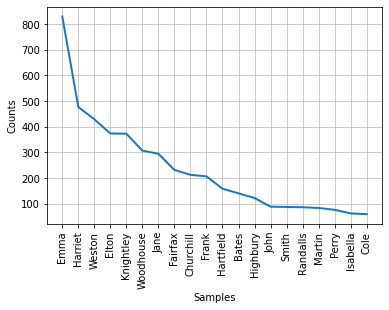

In [56]:
fd_names.plot(20)
plt.show()

## 워드클라우드
wordcloud 패키지를 사용하면 단어의 사용 빈도수에 따라 워드클라우드(Word Cloud) 시각화를 할 수 있다.

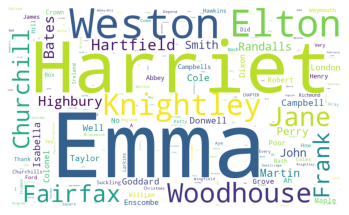

In [57]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color='white', random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis('off')
plt.show()